In [1]:
'''
1.创建数据%alias析的API API 自己用，出个推文的教程，不要使用API！
2.对每个类型的腿图，构建常用的功能，查相关资料
3.将所有的funcion整合到一个类中，方便管理


ref：
https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial
https://zhuanlan.zhihu.com/p/49035741


'''

'\n1.创建数据%alias析的API API 自己用，出个推文的教程，不要使用API！\n2.对每个类型的腿图，构建常用的功能，查相关资料\n3.将所有的funcion整合到一个类中，方便管理\n\n\nref：\nhttps://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot\nhttps://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial\nhttps://zhuanlan.zhihu.com/p/49035741\n\n\n'

In [2]:
'''
seaborn画的图主要分为三种：

类别热点图:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

类别分布图:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

类别评估图:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

当中，有一个更高层级的接口catplot(),使用该接口我们可以画各种各样的图。


'''

'\nseaborn画的图主要分为三种：\n\n类别热点图:\n\nstripplot() (with kind="strip"; the default)\n\nswarmplot() (with kind="swarm")\n\n类别分布图:\n\nboxplot() (with kind="box")\n\nviolinplot() (with kind="violin")\n\nboxenplot() (with kind="boxen")\n\n类别评估图:\n\npointplot() (with kind="point")\n\nbarplot() (with kind="bar")\n\ncountplot() (with kind="count")\n\n当中，有一个更高层级的接口catplot(),使用该接口我们可以画各种各样的图。\n\n\n'

In [3]:
import pandas as pd 
import numpy as np

In [4]:
#配置
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [5]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
import os
data_dir='/Users/van/file/1kaggle_showusthedata/data/coleridgeinitiative-show-us-the-data/'
train_label_file=os.path.join(data_dir,'train.csv')
train_json_dir=os.path.join(data_dir,'train')
test_json_dir=os.path.join(data_dir,'test')


In [7]:
#all json file
from tqdm.notebook import tqdm
import json
def from_json_get_df(json_dir):
    all_train_data_df={'Id':[],'text':[]}
    for dirname,_,filename in os.walk(json_dir):
        print(len(filename),filename[:10])
        i=0
        for ifile in (filename):
            if ".json" in os.path.join(dirname,ifile):
                with open(os.path.join(dirname,ifile)) as f:
                    ijson=json.load(f)
                    all_train_data_df['Id'].append(ifile.split('.json')[-2])
                    tmp_text=""
                    tmp_combin_text=""
                    for i_jslen in range(len(ijson)):
                        tmp_text=tmp_text+" "+ijson[i_jslen]['text']
                        tmp_combin_text=tmp_combin_text+" "+"section_title:"+" "+ijson[i_jslen]['section_title']\
                        +" "+"text:"+" "+ijson[i_jslen]['text']
                    all_train_data_df['text'].append(tmp_combin_text)
                    #all_train_data_df['section_title'].append(ijson[0]['section_title'])

                    
                i+=1
                assert len(all_train_data_df['Id'])==i
    return all_train_data_df

train_df=from_json_get_df(train_json_dir)
test_df=from_json_get_df(test_json_dir)

14316 ['0213936a-340f-47cf-a5e6-2ca353343a77.json', '56951ddb-95e5-4a51-a2e4-f9b2c5ce93b0.json', '736cc1e7-6c25-4669-8d4a-5ae64d2d1882.json', '21e40770-d50c-4a51-b5ea-eb40308bdd75.json', '4fcc89b3-2af2-4c40-b8c4-5fd966138be4.json', '892e762d-4144-4854-95b7-ecfe61eed643.json', 'f1ca08f3-4ec1-4b4c-b55c-40893c3dd8b6.json', 'e25281f8-cac5-4dc3-bb9b-b7192eab09fd.json', '5137e78e-0a3c-4769-901e-0ad7e08a2d76.json', '4e4828b7-276d-4de9-af5c-be1c393a0b95.json']
4 ['8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60.json', '2100032a-7c33-4bff-97ef-690822c43466.json', '2f392438-e215-4169-bebf-21ac4ff253e1.json', '3f316b38-1a24-45a9-8d8c-4e05a42257c6.json']


In [8]:
train_label_df=pd.read_csv(train_label_file)

In [9]:
train_df=pd.DataFrame(train_df)
test_df=pd.DataFrame(test_df)

In [10]:
train_df.head()

,Id,text
0,0213936a-340f-47cf-a5e6-2ca353343a77,"section_title: text: On 26 January 2010, at ..."
1,56951ddb-95e5-4a51-a2e4-f9b2c5ce93b0,section_title: Abstract text: Abstract This s...
2,736cc1e7-6c25-4669-8d4a-5ae64d2d1882,section_title: Abstract text: Many small Amer...
3,21e40770-d50c-4a51-b5ea-eb40308bdd75,section_title: Abstract text: Abstract-We des...
4,4fcc89b3-2af2-4c40-b8c4-5fd966138be4,section_title: Introduction text: In the U.S....


In [11]:
train_label_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


In [12]:
train_label_df['Id'].value_counts()

170113f9-399c-489e-ab53-2faf5c64c5bc    22
dd6df078-2010-42fa-ad30-9c302d2ba55b    12
430aa11c-0283-411b-8edc-08f5df3db258    12
0cbde738-c072-47e7-92b5-b6ccb5661f2d    11
3d61cdd8-240e-4202-9837-db4263fd196a    10
                                        ..
0697a891-b152-4f17-9120-97ef5a3bd704     1
33f0d8c8-ab62-4e9f-9c59-a1509c46cb0c     1
10be098b-546c-4bbc-81ea-f3f5c81c652e     1
98971160-9bf6-4f2d-933b-9a1e66d878cc     1
6b6ef3ea-a643-4c1c-99e3-461ceb0b00f6     1
Name: Id, Length: 14316, dtype: int64

In [13]:
train_label_df['Id'].describe()

count                                    19661
unique                                   14316
top       170113f9-399c-489e-ab53-2faf5c64c5bc
freq                                        22
Name: Id, dtype: object

In [14]:
train_df['Id'].value_counts()

0b2737f7-44ae-4e96-9b1c-3038c48bbe42    1
4cf89c09-4996-4135-8395-19de7fa2c9b0    1
ab13de1a-0150-40da-aaf8-dd38a8a25e07    1
99646156-420e-465b-ae43-d37ac1cd85d8    1
4e9f8fdd-c92b-4b57-9b4c-35fac6294e57    1
                                       ..
49d8209e-c1b1-4599-923b-d67da1eea70b    1
b6a538b9-5abf-43bc-8123-50e9a49081ec    1
2aa7ebf8-2f65-4c11-b193-ae3c624d370c    1
d586256d-61e3-4d47-9b80-10b68b3027d3    1
ac789454-1650-4269-ae2d-7fae247d0c13    1
Name: Id, Length: 14316, dtype: int64

In [15]:
train_df['Id'].describe()

count                                    14316
unique                                   14316
top       0b2737f7-44ae-4e96-9b1c-3038c48bbe42
freq                                         1
Name: Id, dtype: object

In [16]:
test_df.head()

,Id,text
0,8e6996b4-ca08-4c0b-bed2-aaf07a4c6a60,section_title: Introduction text: A significa...
1,2100032a-7c33-4bff-97ef-690822c43466,section_title: Abstract text: Cognitive defic...
2,2f392438-e215-4169-bebf-21ac4ff253e1,section_title: Introduction text: This report...
3,3f316b38-1a24-45a9-8d8c-4e05a42257c6,section_title: INTRODUCTION text: Cape Hatter...


In [17]:
#找到官方给定的label
train_merge_df=pd.merge(train_df,train_label_df,on='Id')

In [18]:
train_merge_df.head()

,Id,text,pub_title,dataset_title,dataset_label,cleaned_label
0,0213936a-340f-47cf-a5e6-2ca353343a77,"section_title: text: On 26 January 2010, at ...",Alzheimer's prevention initiative.,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
1,0213936a-340f-47cf-a5e6-2ca353343a77,"section_title: text: On 26 January 2010, at ...",Alzheimer's prevention initiative.,Alzheimer's Disease Neuroimaging Initiative (A...,Alzheimer's Disease Neuroimaging Initiative (A...,alzheimer s disease neuroimaging initiative adni
2,56951ddb-95e5-4a51-a2e4-f9b2c5ce93b0,section_title: Abstract text: Abstract This s...,Changing Urbanization Patterns in US Lung Canc...,Rural-Urban Continuum Codes,Rural-Urban Continuum Codes,rural urban continuum codes
3,736cc1e7-6c25-4669-8d4a-5ae64d2d1882,section_title: Abstract text: Many small Amer...,Examining the Economic Benefits of Agritourism...,Census of Agriculture,Census of Agriculture,census of agriculture
4,21e40770-d50c-4a51-b5ea-eb40308bdd75,section_title: Abstract text: Abstract-We des...,Knee X-Ray Image Analysis Method for Automated...,Baltimore Longitudinal Study of Aging (BLSA),Baltimore Longitudinal Study of Aging (BLSA),baltimore longitudinal study of aging blsa


In [19]:
len(train_merge_df)

19661

In [20]:
train_grouped=train_merge_df.groupby(['Id','text']) 

In [21]:
len(train_grouped)

14316

In [22]:
#使用 apply =====>dataframe
def f(x):
     return pd.Series(dict(pub_title =list(set(x['pub_title'])), 
                        dataset_title = list(set(x['dataset_title'])), 
                        cleaned_label=list(set(x['cleaned_label'])),
                        dataset_label =list(set(x['dataset_label']))))
train_grouped_df=train_grouped.apply(f)


In [23]:
len(train_grouped_df)

14316

In [24]:
train_grouped_df.head()

pub_title  \
Id                                   text                                                                                                    
0007f880-0a9b-492d-9a58-76eb0b0e0bd7  section_title: Abstract text: The aim of this ...  [The Impact of ICT Training on Income Generati...   
0008656f-0ba2-4632-8602-3017b44c2e90  section_title: Abstract text: In this study, F...  [Finnish Ninth Graders’ Gender Appropriateness...   
000e04d6-d6ef-442f-b070-4309493221ba  section_title: Highlights text: Through the U....  [ Economic Research Service: Specialized Agenc...   
000efc17-13d8-433d-8f62-a3932fe4f3b8  section_title: Abstract text: Risk factors and...  [Risk factors and global cognitive status rela...   
0010357a-6365-4e5f-b982-582e6d32c3ee  section_title:  text: Potential Conflicts of I...                   [Timelines of COVID-19 Vaccines]   

                                                                                                                             dataset_title  \
Id                                   text                                                                                                    
0007f880-0a9b-492d-9a58-76eb0b0e0bd7  section_title: Abstract text: The aim of this ...  [Program for the International Assessment of A...   
0008656f-0ba2-4632-8602-3017b44c2e90  section_title: Abstract text: In this study, F...  [Trends in International Mathematics and Scien...   
000e04d6-d6ef-442f-b070-4309493221ba  section_title: Highlights text: Through the U....          [Agricultural Resource Management Survey]   
000efc17-13d8-433d-8f62-a3932fe4f3b8  section_title: Abstract text: Risk factors and...  [Alzheimer's Disease Neuroimaging Initiative (...   
0010357a-6365-4e5f-b982-582e6d32c3ee  section_title:  text: Potential Conflicts of I...                       [SARS-CoV-2 genome sequence]   

                                                                                                                             cleaned_label  \
Id                                   text                                                                                                    
0007f880-0a9b-492d-9a58-76eb0b0e0bd7  section_title: Abstract text: The aim of this ...  [program for the international assessment of a...   
0008656f-0ba2-4632-8602-3017b44c2e90  section_title: Abstract text: In this study, F...  [trends in international mathematics and scien...   
000e04d6-d6ef-442f-b070-4309493221ba  section_title: Highlights text: Through the U....         [agricultural resources management survey]   
000efc17-13d8-433d-8f62-a3932fe4f3b8  section_title: Abstract text: Risk factors and...  [adni, alzheimer s disease neuroimaging initia...   
0010357a-6365-4e5f-b982-582e6d32c3ee  section_title:  text: Potential Conflicts of I...                      [genome sequence of covid 19]   

                                                                                                                             dataset_label  
Id                                   text                                                                                                   
0007f880-0a9b-492d-9a58-76eb0b0e0bd7  section_title: Abstract text: The aim of this ...  [Program for the International Assessment of A...  
0008656f-0ba2-4632-8602-3017b44c2e90  section_title: Abstract text: In this study, F...  [Trends in International Mathematics and Scien...  
000e04d6-d6ef-442f-b070-4309493221ba  section_title: Highlights text: Through the U....         [Agricultural Resources Management Survey]  
000efc17-13d8-433d-8f62-a3932fe4f3b8  section_title: Abstract text: Risk factors and...  [Alzheimer's Disease Neuroimaging Initiative (...  
0010357a-6365-4e5f-b982-582e6d32c3ee  section_title:  text: Potential Conflicts of I...                      [genome sequence of COVID-19]

In [25]:
train_grouped_df=train_grouped_df.reset_index()

In [26]:
#计算label的长度
def label_count(df):
    return len(df)
train_grouped_df['dataset_label_count']=train_grouped_df['dataset_label'].apply(label_count)

In [27]:
train_grouped_df['dataset_label_count'].describe(percentiles=[0.25,0.8,0.9,0.95,0.99])

count    14316.000000
mean         1.373358
std          0.647486
min          1.000000
25%          1.000000
50%          1.000000
80%          2.000000
90%          2.000000
95%          2.000000
99%          3.000000
max         22.000000
Name: dataset_label_count, dtype: float64

In [28]:
train_grouped_df['dataset_title_count']=train_grouped_df['dataset_title'].apply(label_count)

In [29]:
train_grouped_df['dataset_title_count'].describe(percentiles=[0.25,0.8,0.9,0.95,0.99])

count    14316.000000
mean         1.087594
std          0.399105
min          1.000000
25%          1.000000
50%          1.000000
80%          1.000000
90%          1.000000
95%          2.000000
99%          3.000000
max         12.000000
Name: dataset_title_count, dtype: float64

In [30]:
train_grouped_df['cleaned_label_count']=train_grouped_df['cleaned_label'].apply(label_count)

In [31]:
train_grouped_df['cleaned_label_count'].describe(percentiles=[0.25,0.8,0.9,0.95,0.99])

count    14316.000000
mean         1.373358
std          0.647486
min          1.000000
25%          1.000000
50%          1.000000
80%          2.000000
90%          2.000000
95%          2.000000
99%          3.000000
max         22.000000
Name: cleaned_label_count, dtype: float64

In [32]:
tmp_df=train_grouped_df.loc[train_grouped_df['cleaned_label_count']==3]

In [33]:
tmp_df['cleaned_label']

23       [national education longitudinal study, educat...
44       [slosh model, noaa tide station, noaa tide gauge]
87       [national education longitudinal study, educat...
200      [national education longitudinal study, educat...
212      [national assessment of education progress, na...
                               ...                        
14136    [survey of earned doctorates, survey of gradua...
14217    [beginning postsecondary students longitudinal...
14226    [baltimore longitudinal study of aging, alzhei...
14252    [beginning postsecondary students, national ed...
14285    [beginning postsecondary students longitudinal...
Name: cleaned_label, Length: 234, dtype: object

In [34]:
train_grouped_df.head()

,Id,text,pub_title,dataset_title,cleaned_label,dataset_label,dataset_label_count,dataset_title_count,cleaned_label_count
0,0007f880-0a9b-492d-9a58-76eb0b0e0bd7,section_title: Abstract text: The aim of this...,[The Impact of ICT Training on Income Generati...,[Program for the International Assessment of A...,[program for the international assessment of a...,[Program for the International Assessment of A...,1,1,1
1,0008656f-0ba2-4632-8602-3017b44c2e90,"section_title: Abstract text: In this study, ...",[Finnish Ninth Graders’ Gender Appropriateness...,[Trends in International Mathematics and Scien...,[trends in international mathematics and scien...,[Trends in International Mathematics and Scien...,1,1,1
2,000e04d6-d6ef-442f-b070-4309493221ba,section_title: Highlights text: Through the U...,[ Economic Research Service: Specialized Agenc...,[Agricultural Resource Management Survey],[agricultural resources management survey],[Agricultural Resources Management Survey],1,1,1
3,000efc17-13d8-433d-8f62-a3932fe4f3b8,section_title: Abstract text: Risk factors an...,[Risk factors and global cognitive status rela...,[Alzheimer's Disease Neuroimaging Initiative (...,"[adni, alzheimer s disease neuroimaging initia...",[Alzheimer's Disease Neuroimaging Initiative (...,2,1,2
4,0010357a-6365-4e5f-b982-582e6d32c3ee,section_title: text: Potential Conflicts of ...,[Timelines of COVID-19 Vaccines],[SARS-CoV-2 genome sequence],[genome sequence of covid 19],[genome sequence of COVID-19],1,1,1


In [35]:
(train_grouped_df.loc[train_grouped_df['cleaned_label_count']!=train_grouped_df['dataset_label_count']])[['cleaned_label','dataset_label','dataset_title']].to_csv('./test.csv')



In [36]:
#label的数量计算
label_value=[]
for i_index,irow in train_grouped_df.iterrows():
    label_value.extend(irow['dataset_label'])
from collections import Counter
label_cou=Counter(label_value)

In [37]:
label_count_df=pd.DataFrame()
label_count_df['label_name']=list(label_cou.keys())
label_count_df['label_count']=list(label_cou.values())

In [38]:
label_count_df.head(10)

,label_name,label_count
0,Program for the International Assessment of Ad...,65
1,Trends in International Mathematics and Scienc...,1163
2,Agricultural Resources Management Survey,24
3,Alzheimer's Disease Neuroimaging Initiative (A...,2400
4,ADNI,3673
5,genome sequence of COVID-19,7
6,Early Childhood Longitudinal Study,1011
7,Baltimore Longitudinal Study of Aging,1156
8,Baltimore Longitudinal Study of Aging (BLSA),433
9,NOAA Tide Gauge,299


In [39]:
label_count_df_sorted=label_count_df.sort_values(['label_count'],ascending=False)

In [40]:
label_count_df_sorted['label_count_percent']=label_count_df_sorted['label_count']/sum(label_count_df_sorted['label_count'])

In [41]:
label_count_df_sorted.head(20)

,label_name,label_count,label_count_percent
4,ADNI,3673,0.186817
3,Alzheimer's Disease Neuroimaging Initiative (A...,2400,0.122069
1,Trends in International Mathematics and Scienc...,1163,0.059153
7,Baltimore Longitudinal Study of Aging,1156,0.058797
6,Early Childhood Longitudinal Study,1011,0.051422
16,Education Longitudinal Study,676,0.034383
23,Census of Agriculture,643,0.032704
19,Agricultural Resource Management Survey,623,0.031687
17,National Education Longitudinal Study,550,0.027974
21,Rural-Urban Continuum Codes,490,0.024922


In [42]:
def draw_bar_chart_plot(data,x=None,y=None,hue=None,ci=None,fig_x=10,fig_y=10,fig_title=None):
    '''
    1.图的高度表示了，这些变量的集中的趋势 
    2. 条形图反映的是平均值
    3. 两种形式：
     long -form(推荐):
       需要指定x,y (在通常是dataframe中为列名)
     wide -form：
       画图的是根据输入数据(通常是dataframe obj)的每列数据 
    
    4. 关键参数：
    x x坐标的name 
    y y坐标的name
    hue 类别对应的column名字 
    ci ==None  不用采样的方式获取观测值
    data DataFrame obj(推荐) 
    orient 水平或者垂直 
    color 所有元素的颜色
    palette 对于hue变量的不一样的值，所使用的(不同层次的)颜色 
    
    '''
    
    '''df的输入格式：
        label_1,label2,...
     x[0],  y_1[0]   , y_2[0]
     x[1],  y_1[1]   , y_2[1]
     ...
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    print("Setup Complete")
    #设置风格主题，还有哪些？？？？？
    #sns.set_theme(style="whitegrid")
    
    #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
    #label===>设置图中label的标签
    if x is  None and y is None:  
        #没有指定列，则所有列全部被使用
        sns.barplot(data=data,ci=ci) 
    else:
        #直接使用df的对应列作为y坐标,label_name作为类名
        sns.barplot(data=data,x=x,y=y,hue=hue,ci=ci)

In [43]:
label_count_df_sorted[['label_count']][:2].T

,4,3
label_count,3673,2400


In [44]:
label_count_df_sorted

,label_name,label_count,label_count_percent
4,ADNI,3673,0.186817
3,Alzheimer's Disease Neuroimaging Initiative (A...,2400,0.122069
1,Trends in International Mathematics and Scienc...,1163,0.059153
7,Baltimore Longitudinal Study of Aging,1156,0.058797
6,Early Childhood Longitudinal Study,1011,0.051422
...,...,...,...
102,NOAA storm surge inundation,1,0.000051
99,Advanced National Seismic System Comprehensive...,1,0.000051
80,National Center for Science and Engineering St...,1,0.000051
81,National Center for Science and Engineering St...,1,0.000051


Setup Complete


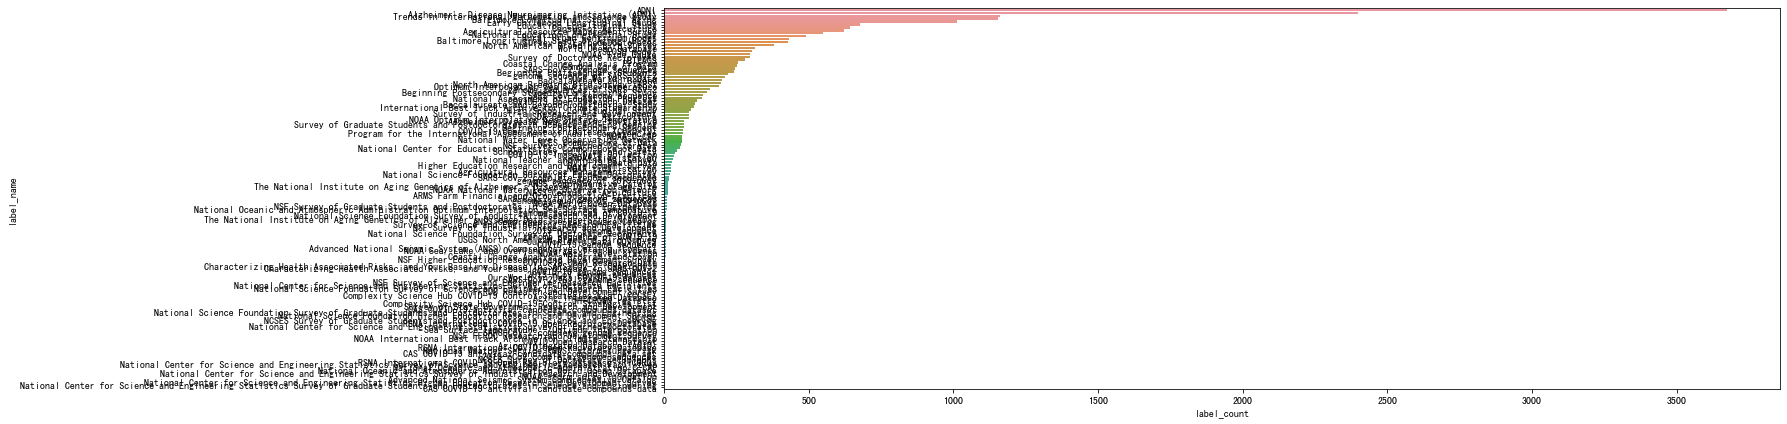

In [45]:
draw_bar_chart_plot(label_count_df_sorted,x='label_count',y='label_name',fig_x=20,fig_y=7)

In [46]:
def draw_line_plot(data,x=None,y=None,hue=None,ci=None,fig_x=10,fig_y=10,fig_title=None):
    
    '''df的输入格式：
        label_1,label2,...
     x[0],  y_1[0]   , y_2[0]
     x[1],  y_1[1]   , y_2[1]
     ...
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    关键参数：
    x x坐标的name 
    y y坐标的name
    hue 类别对应的column名字 
    ci ==None  不用采样的方式获取观测值
    '''
    
    
    #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
    #label===>设置图中label的标签
    if x==None or y==None:
        #没有指定列，则所有列全部被使用
        sns.lineplot(data=data,hue=hue,ci=ci)
    else:
        #直接使用df的对应列作为y坐标,label_name作为类名
        sns.lineplot(data=data,x=x,y=y,hue=hue,ci=ci)

In [47]:
label_count_df_sorted['label_count_percent_100']=label_count_df_sorted['label_count_percent']*100

In [48]:
label_count_df_sorted['range']=list(range(len(label_count_df_sorted)))

In [49]:
label_count_df_sorted[:5]

,label_name,label_count,label_count_percent,label_count_percent_100,range
4,ADNI,3673,0.186817,18.681654,0
3,Alzheimer's Disease Neuroimaging Initiative (A...,2400,0.122069,12.206907,1
1,Trends in International Mathematics and Scienc...,1163,0.059153,5.915264,2
7,Baltimore Longitudinal Study of Aging,1156,0.058797,5.879660,3
6,Early Childhood Longitudinal Study,1011,0.051422,5.142160,4


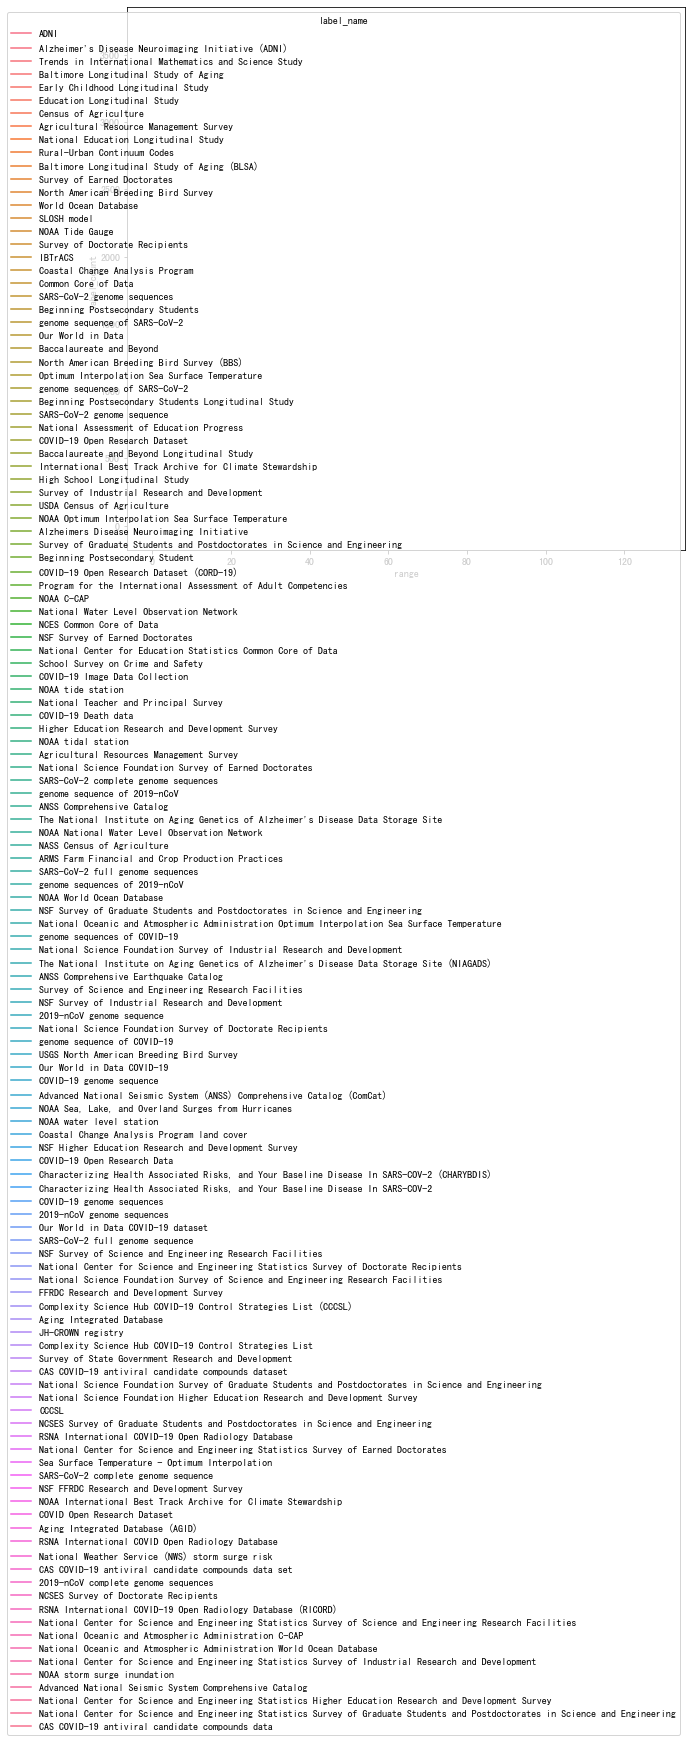

In [50]:
draw_line_plot(label_count_df_sorted,x='range',y='label_count',hue='label_name')

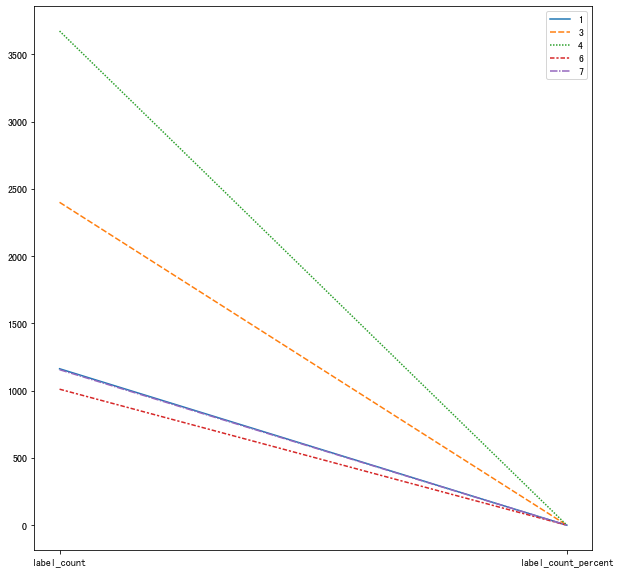

In [51]:
draw_line_plot(label_count_df_sorted[:5][['label_count','label_count_percent']].T)

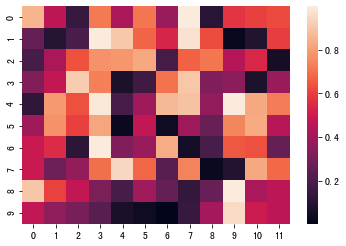

In [52]:
#sample
import numpy as np
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [53]:
def draw_heatmap(data,annot=False,fmt=None,vmin=None,vmax=None,cmap='YlGnBu',fig_x=10,fig_y=10,fig_title=None):
    #热图
    #详细内容参考：
    #https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
    #https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps
    '''df的输入格式：
        label_1,label2,...
     x[0],  y_1[0]   , y_2[0]
     x[1],  y_1[1]   , y_2[1]
     ...
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    关键参数：
    data:能够转化为2维ndarray,使用dataframe对象时headmap的横纵坐标的label从行列名中自动找出
    
    annot:图中是否标识出label值
    fmt:annot的格式，'d'表示整数格式,'.1f'表示小数（保留小数点后一位）
        annot和fmt一般要同时使用。
        
    vmin, vmax:热点图的bar中的最大值和最小值范围，不提供则自动统计
    cmap：热点图的颜色样式，如“YlGnBu”/
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)

    #直接使用df的对应列作为y坐标,label_name作为类名
    sns.heatmap(data=data,annot=annot,fmt=fmt,vmin=vmin,vmax=vmax,cmap=cmap)

    
    

In [87]:
uniform_data

array([[0.85698915, 0.46768998, 0.14852014, 0.72161071, 0.42472003,
        0.71165371, 0.38468119, 0.99570385, 0.10930844, 0.5770863 ,
        0.60486935, 0.62325498],
       [0.26493141, 0.10118968, 0.19390282, 0.9965    , 0.90872335,
        0.67503081, 0.53681016, 0.97386858, 0.62657175, 0.02029625,
        0.09370786, 0.59439185],
       [0.18672701, 0.42628619, 0.63705428, 0.77575352, 0.78270022,
        0.82876313, 0.18510992, 0.67151259, 0.71395095, 0.44598547,
        0.54060483, 0.05752562],
       [0.32669206, 0.47896808, 0.9168641 , 0.73316335, 0.07434983,
        0.16806876, 0.7041416 , 0.90337423, 0.32206586, 0.35138771,
        0.08002126, 0.38535431],
       [0.12777976, 0.79037198, 0.63615333, 0.9872322 , 0.19000829,
        0.39788708, 0.86941096, 0.89275111, 0.36659198, 0.99882934,
        0.83000965, 0.72962787],
       [0.39606759, 0.77517869, 0.6020973 , 0.82024046, 0.03206325,
        0.47583638, 0.03885726, 0.39446851, 0.27048841, 0.74602842,
        0.8319755 ,

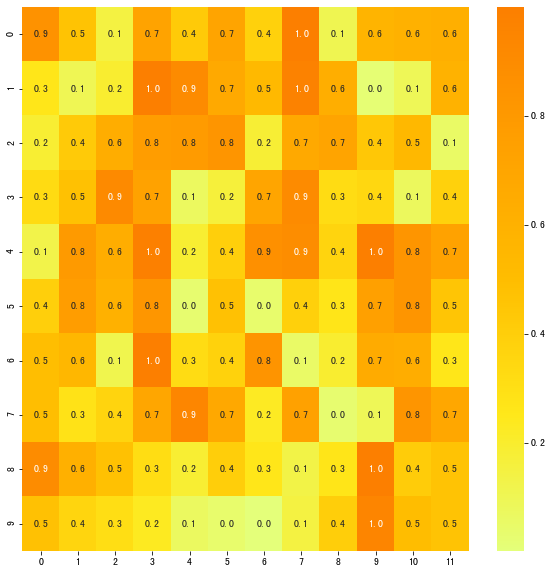

In [86]:
draw_heatmap(uniform_data,annot=True,fmt='.1f',cmap='Wistia')

In [55]:
sample_path='/Users/van/Downloads/insurance.csv'

In [56]:
df_sample=pd.read_csv(sample_path)

In [57]:
df_sample.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [58]:
def draw_scatter_plot(data,x=None,y=None,hue=None,size=None,style=None,fig_x=10,fig_y=10,fig_title=None):
    #热图
    #详细内容参考：
    #https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot
    #https://www.kaggle.com/alexisbcook/scatter-plots
    '''df的输入格式：
        label_1,label2,...
     x[0],  y_1[0]   , y_2[0]
     x[1],  y_1[1]   , y_2[1]
     ...
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    功能：通过x,y展示和(hue,size,style)等参数来战术不同子集之间的关系
    
    关键参数：
    data:能够转化为2维ndarray,使用dataframe对象时headmap的横纵坐标的label从行列名中自动找出
    x:明确data中的哪一列作为x轴
    y:明确data中的哪一列作为y轴
    hue:不同类别对应的column名字====>对应不同的色调 
    size:不同类别对应的column名字====>对应不同的大小（可通过sizes参数调节大小）
    style:不同类别对应的column名字====>对应不同的风格
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   

    #直接使用df
    if x==None and y==None:
        sns.scatterplot(data)
    else:
        sns.scatterplot(data=data,x=x,y=y,hue=hue,size=size,style=style)

    
    

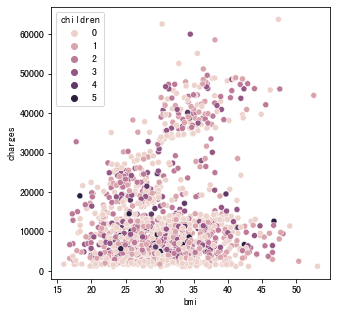

In [89]:
draw_scatter_plot(df_sample,x='bmi',y='charges',hue='children',fig_x=5,fig_y=5)

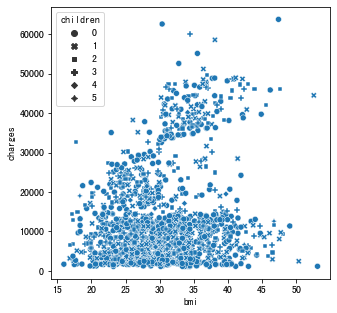

In [60]:
draw_scatter_plot(df_sample,x='bmi',y='charges',style='children',fig_x=5,fig_y=5)

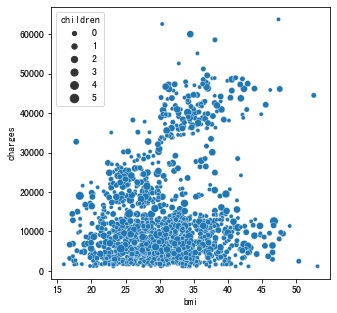

In [61]:
draw_scatter_plot(df_sample,x='bmi',y='charges',size='children',fig_x=5,fig_y=5)

In [62]:
def draw_regplot(data,x,y,fig_x=10,fig_y=10,fig_title=None):
    '''
    画出这些数据，同时画出这些数据的回归模型
    Ref:
    https://www.kaggle.com/alexisbcook/scatter-plots
    https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名
    x_ci：设置置信区间
    ci:置信区间的值（0-100）
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.regplot(data=data,x=x,y=y)
    

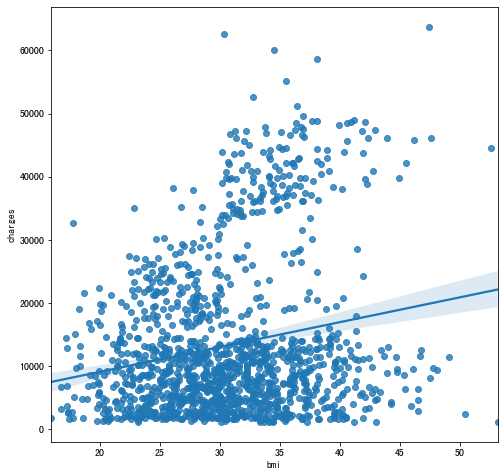

In [63]:
draw_regplot(df_sample,x='bmi',y='charges',fig_x=8,fig_y=8)

In [64]:
def draw_lmplot(data,x,y,hue,fig_x=10,fig_y=10,fig_title=None):
    '''
    画出多组数据，同时画出多组数据的回归模型，
    Ref:
    https://www.kaggle.com/alexisbcook/scatter-plots
    https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名
    x_ci：设置置信区间
    ci:置信区间的值（0-100）
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.lmplot(data=data,x=x,y=y,hue=hue)
    

<Figure size 720x720 with 0 Axes>

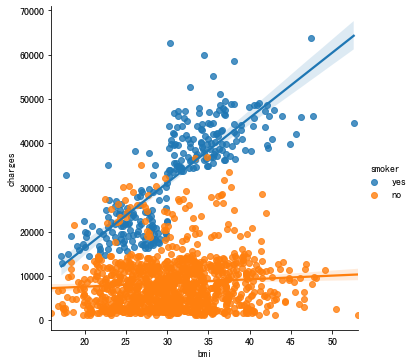

In [65]:
draw_lmplot(df_sample,x='bmi',y='charges',hue='smoker',fig_x=10,fig_y=10)

In [66]:
def draw_swarmplot(data,x,y,hue=None,fig_x=10,fig_y=10,fig_title=None):
    '''
    Draw a categorical scatterplot with non-overlapping points.
    画出一个不会有重合点的类别散点图
    
    Ref:
    https://www.kaggle.com/alexisbcook/scatter-plots
    https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    data:Dataframe格式的数据
    x:横坐标的列名
    y:纵坐标的列名

    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.swarmplot(data=data,x=x,y=y,hue=hue)
    

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


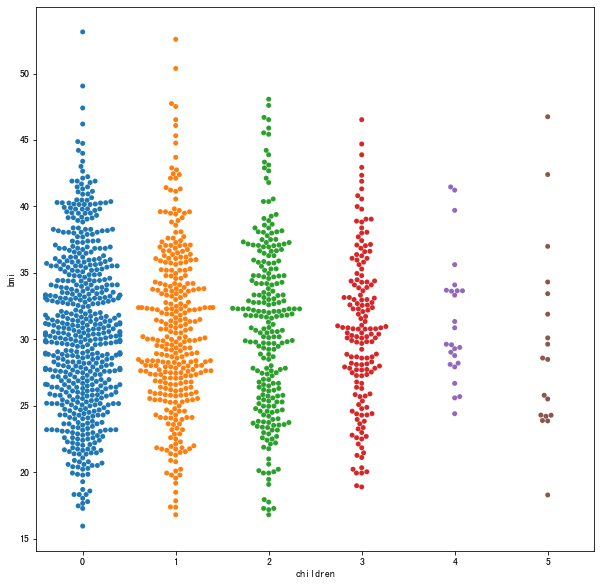

In [67]:
draw_swarmplot(df_sample,x='children',y='bmi')

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


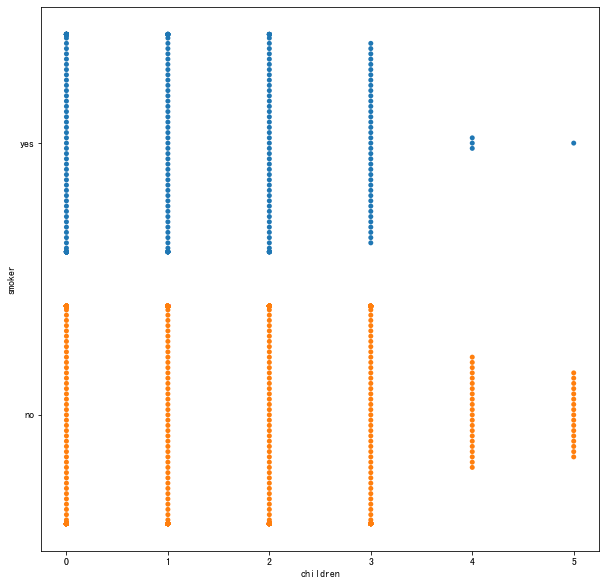

In [68]:
draw_swarmplot(df_sample,x='children',y='smoker')

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


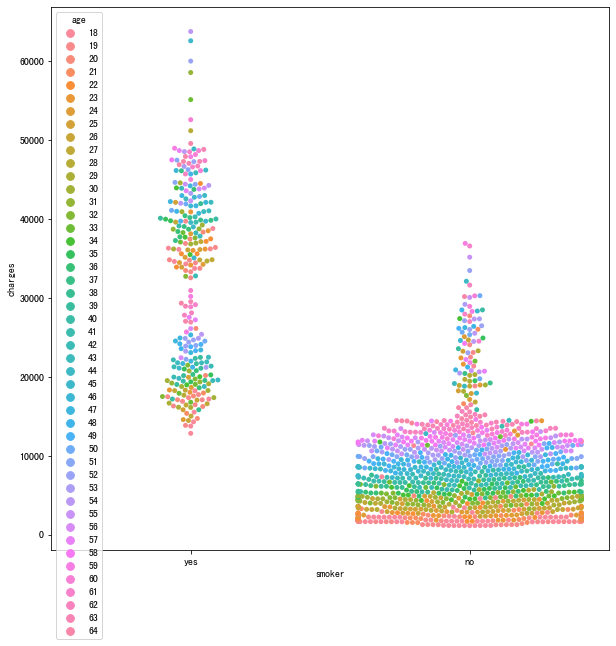

In [69]:
draw_swarmplot(df_sample,x='smoker',y='charges',hue='age')

In [70]:
import sys
print(sys.executable)

/Users/van/anaconda/anaconda3/envs/python36/bin/python


In [71]:
!/Users/van/anaconda/anaconda3/envs/python36/bin/python -m pip install wordcloud

You should consider upgrading via the '/Users/van/anaconda/anaconda3/envs/python36/bin/python -m pip install --upgrade pip' command.


In [72]:
import matplotlib
print(matplotlib.matplotlib_fname())

/Users/van/anaconda/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [73]:
#词云！！！

def draw_wordcolud(allwords=None):
    #allwords---->word_list
    from wordcloud import WordCloud, STOPWORDS
    from collections import Counter
    if not allwords:
        allwords=['好']*100+['不好']*10+['差']*10+['优秀']*100
    mostcommon = sorted(Counter(allwords).items(),key=lambda x:x[1],reverse=True)#[('好',0.1),('优秀',0.2),('不好',0.9),('差',0.8),]#FreqDist(allwords).most_common(100)#来自文本中出现频率最高的100个词

    #设置中文字体的路径
    font = '/Library/Fonts/Songti.ttc'
    
    #WordCloud重要参数
    #min_font_size:最小的字体大小default=4
    #font_step：字体增长的step
    #max_words：能够画的最多的字
    #stopwords：停用词（不展示）
    #background_color：背景颜色
    #max_font_size：最大的字体尺寸
    #relative_scaling:字的相对大小，relative_scaling=0时，只考虑rank排名，relative_scaling=1字体大小和重要性的两倍成正比
    #           default=’auto’即relative_scaling=0.5，此时只考虑词的重要性
    #repeat：没有达到最大的词数量或者最小的字体大小时，是否重复词云中的word,default=False
    #include_numbers：是否包含数字default=False
    wordcloud = WordCloud(width=1600, height=800,font_path=font,relative_scaling=1,repeat=True, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))

    fig = plt.figure(figsize=(30,10), facecolor='white')

    plt.imshow(wordcloud, interpolation="bilinear")

    #关掉坐标显示
    plt.axis('off')

    plt.title('Top 100 Most Common Words in cleaned_label', fontsize=50)
    #padding
    plt.tight_layout(pad=0)

    plt.show()

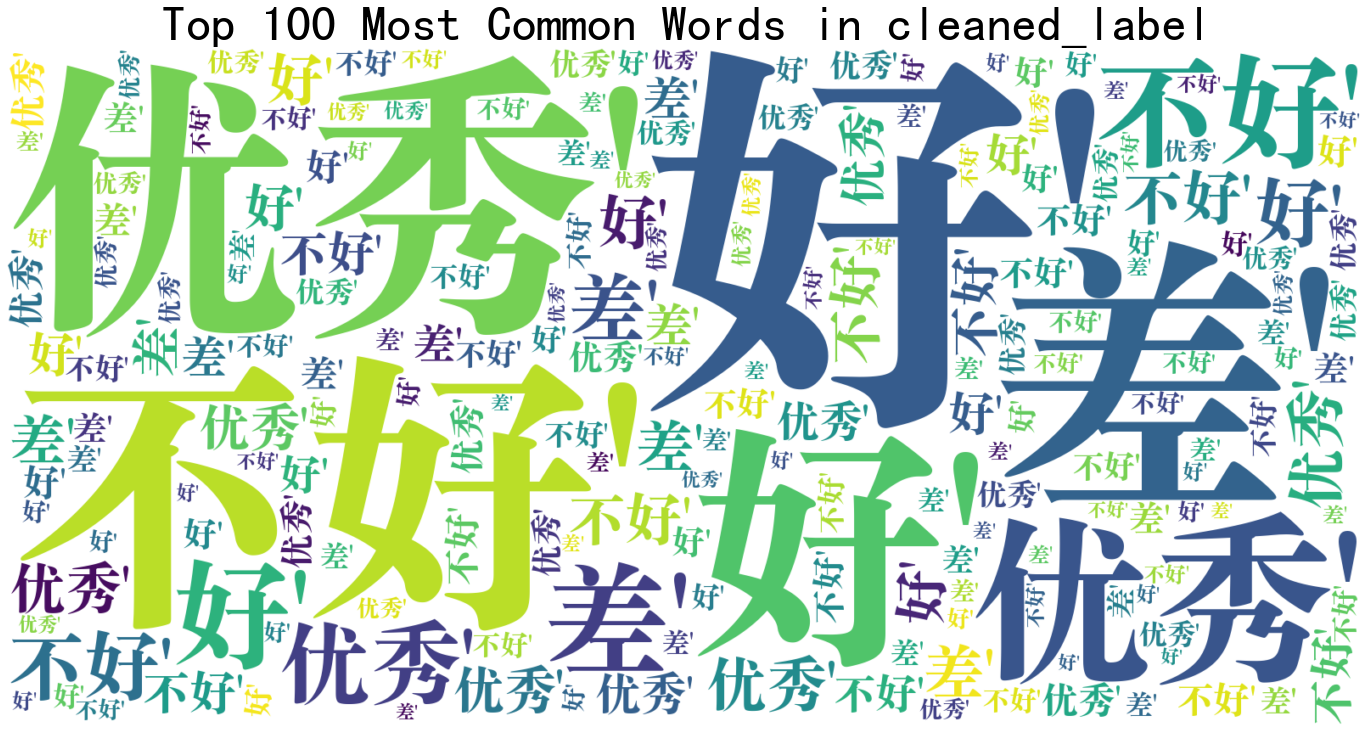

In [74]:
draw_wordcolud()

In [75]:

def draw_kde_plot(data,x,y,hue=None,shade=True,fig_title=None,fig_x=10,fig_y=10):
    
    '''
    Plot univariate or bivariate distributions using kernel density estimation.
    使用核密度估计绘制单变量或双变量分布。
    用连续变量展示数据的分布。
    
    Ref:
    https://www.kaggle.com/alexisbcook/distributions
    https://seaborn.pydata.org/generated/seaborn.kdeplot.html
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    data:DataFrame obj.
    x:横坐标列名
    y:纵坐标列名
    shade：bool,是否使用阴影
    hue:色调列
    
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.kdeplot(data=data,x=x,y=y,hue=hue,shade=shade)
    
    

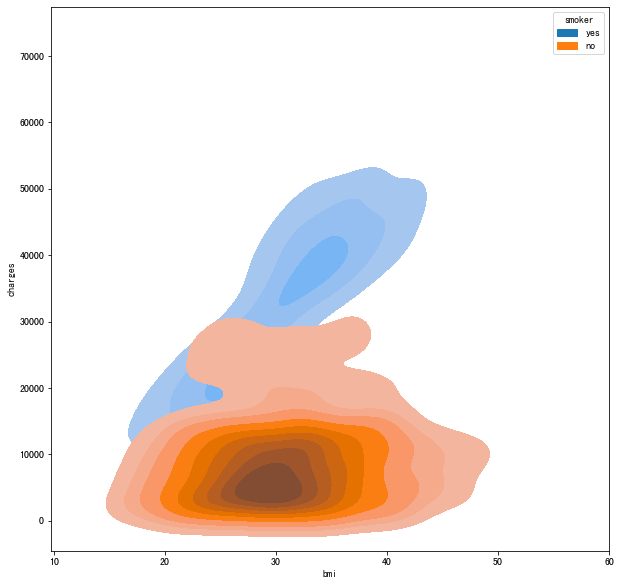

In [76]:
draw_kde_plot(df_sample,x='bmi',y='charges',hue='smoker')

In [77]:

def draw_jointplot(data,x,y,hue=None,kind='kde',fig_title=None,fig_x=10,fig_y=10):
    
    '''
    Draw a plot of two variables with bivariate and univariate graphs.
    用双变量和单变量图绘制两个变量的图。
    
    Ref:
    https://www.kaggle.com/alexisbcook/distributions
    http://seaborn.pydata.org/generated/seaborn.jointplot.html
    
    '''
    #配置
    import pandas as pd
    pd.plotting.register_matplotlib_converters()
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    #print("Setup Complete")
    
    '''
    data:DataFrame obj.
    x:横坐标列名
    y:纵坐标列名
    shade：bool,是否使用阴影
    hue:色调列
    kind:不同种类的图，包括{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
    
    
    '''
    
     #设置画布大小
    plt.figure(figsize=(fig_x,fig_y))
    # 添加标题
    if fig_title:
        plt.title(fig_title)
   
    sns.jointplot(data=data,x=x,y=y,hue=hue,kind=kind)
    
    

<Figure size 720x720 with 0 Axes>

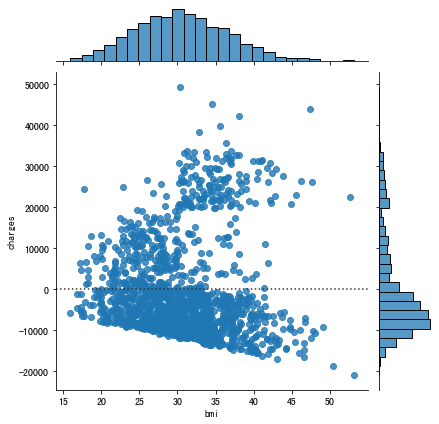

In [78]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='resid')

<Figure size 720x720 with 0 Axes>

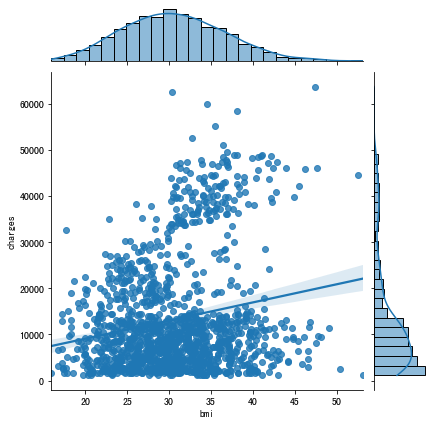

In [79]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='reg')

<Figure size 720x720 with 0 Axes>

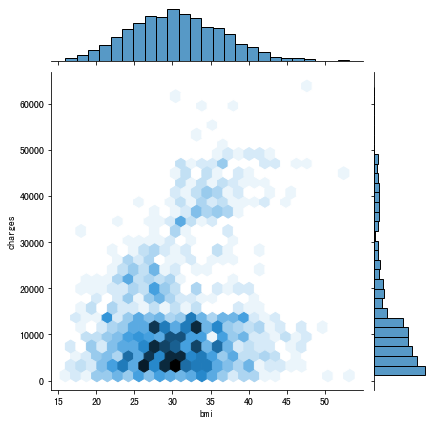

In [80]:
draw_jointplot(df_sample,x='bmi',y='charges',kind='hex')

<Figure size 1080x1080 with 0 Axes>

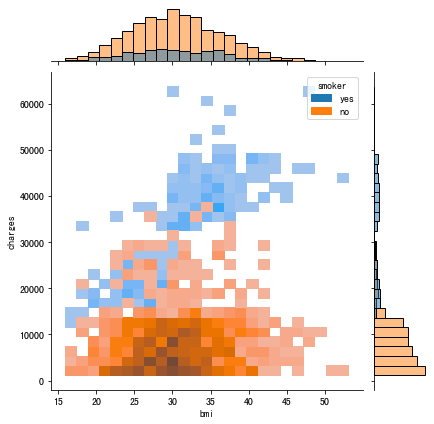

In [81]:
draw_jointplot(df_sample,x='bmi',y='charges',hue='smoker',kind='hist',fig_x=15,fig_y=15)

<Figure size 720x720 with 0 Axes>

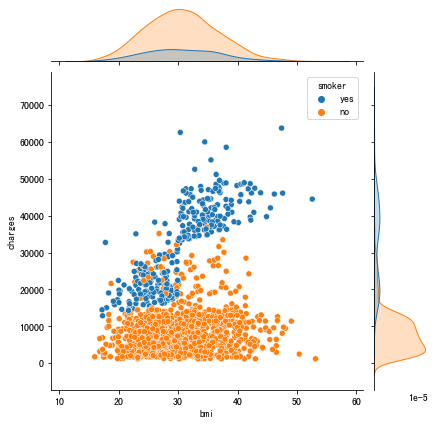

In [82]:
draw_jointplot(df_sample,x='bmi',y='charges',hue='smoker',kind='scatter')

In [67]:
df_sample.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
train_grouped_df.head(1)

,Id,text,cleaned_label,dataset_label,dataset_title,pub_title,dataset_label_count,dataset_title_count,cleaned_label_count
0,0007f880-0a9b-492d-9a58-76eb0b0e0bd7,section_title: Abstract text: The aim of this...,[program for the international assessment of a...,[Program for the International Assessment of A...,[Program for the International Assessment of A...,[The Impact of ICT Training on Income Generati...,1,1,1


In [96]:
train_grouped_df_newindex=train_grouped_df

In [97]:
#判断每篇文章中 有的可能的label,不包含clean label
all_label=set()
for index,irow in train_grouped_df_newindex.iterrows():
    all_label.update(irow['dataset_label'])
    all_label.update(irow['dataset_title'])

contained_label=[[] for i in range(len(train_grouped_df_newindex))]
for igt_label in tqdm(all_label):
    for index,irow in (train_grouped_df_newindex.iterrows()):
        text=' '+irow['text']+' '
        if ' '+igt_label+' ' in text:
            contained_label[index].append(igt_label)


  0%|          | 0/133 [00:00<?, ?it/s]

In [105]:
len(all_label)

133

In [106]:
train_grouped_df_newindex['contained_label']=contained_label

In [107]:
train_grouped_df_newindex['contained_label_count']=train_grouped_df_newindex['contained_label'].apply(label_count)

In [108]:
train_grouped_df_newindex['contained_label_count'].describe(percentiles=[0.25,0.8,0.9,0.95,0.99])

count    14316.000000
mean         1.060352
std          0.833370
min          0.000000
25%          1.000000
50%          1.000000
80%          2.000000
90%          2.000000
95%          2.000000
99%          3.000000
max         13.000000
Name: contained_label_count, dtype: float64

In [109]:
train_grouped_df_newindex.loc[train_grouped_df_newindex['contained_label_count']>train_grouped_df_newindex['dataset_label_count']]


,Id,text,cleaned_label,dataset_label,dataset_title,pub_title,dataset_label_count,dataset_title_count,cleaned_label_count,contained_label,contained_label_count
30,00971597-e7c2-4c2a-9a87-b5ec24529cfd,section_title: Abstract text: Identifying pat...,[adni],[ADNI],[Alzheimer's Disease Neuroimaging Initiative (...,[Hierarchical Interactions Model for Predictin...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
32,00a78eac-13b0-4164-9256-ae436a67f71c,section_title: Introduction text: A commonly ...,[agricultural resource management survey],[Agricultural Resource Management Survey],[Agricultural Resource Management Survey],[ An analysis of the relationship between surv...,1,1,1,"[Census of Agriculture, Agricultural Resource ...",2
55,0119351c-9cd9-44ea-b99c-6942938d009d,section_title: Abstract text: Abstract The si...,[alzheimer s disease neuroimaging initiative a...,[Alzheimer's Disease Neuroimaging Initiative (...,[Alzheimer's Disease Neuroimaging Initiative (...,[The Effect of Age Correction on Multivariate ...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
78,0149b638-6f73-469c-b75d-4b0e36c3f67a,section_title: Abstract text: Both contribute...,[alzheimer s disease neuroimaging initiative a...,[Alzheimer's Disease Neuroimaging Initiative (...,[Alzheimer's Disease Neuroimaging Initiative (...,[Amyloid Network Topology Characterizes the Pr...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
137,021459a3-944d-405c-840c-23ef7d17cc0a,section_title: Abstract text: Introduction: T...,[adni],[ADNI],[Alzheimer's Disease Neuroimaging Initiative (...,[Association between cell-bound blood amyloid-...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
...,...,...,...,...,...,...,...,...,...,...,...
14055,fbb38eaa-bc53-49ab-9376-efe31efc79d4,section_title: 2.6 text: Distribution of R va...,[slosh model],[SLOSH model],"[Sea, Lake, and Overland Surges from Hurricanes]",[ Using Downscaled Global Climate Models to Pe...,1,1,1,"[Sea, Lake, and Overland Surges from Hurricane...",2
14230,fe69fb28-313a-4f9b-969e-a00a4d9caf11,section_title: Abstract text: Abstract. Later...,[alzheimer s disease neuroimaging initiative a...,[Alzheimer's Disease Neuroimaging Initiative (...,[Alzheimer's Disease Neuroimaging Initiative (...,[Default Mode Network Lateralization and Memor...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
14232,fe737e51-3794-460c-a85a-0ef32f9e2ca0,section_title: Abstract text: Olfactory impai...,[adni],[ADNI],[Alzheimer's Disease Neuroimaging Initiative (...,[Functional Connectivity between the Resting-S...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2
14290,ff7c59e7-c3a5-4ee3-993c-dc30d9296e4b,section_title: Abstract text: For a two-sampl...,[alzheimer s disease neuroimaging initiative a...,[Alzheimer's Disease Neuroimaging Initiative (...,[Alzheimer's Disease Neuroimaging Initiative (...,[Targeted Recruitment Using Cerebrospinal Flui...,1,1,1,"[ADNI, Alzheimer's Disease Neuroimaging Initia...",2


In [103]:
import multiprocessing
multiprocessing.cpu_count()

8

In [160]:
import re
def clean_text(txt):
  return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower())

In [161]:
not re.search(r'[\s\\]','fewf fregres')

False

In [162]:
print([clean_text('alzheimer s disease neuroimaging initiative adni ')])

['alzheimer s disease neuroimaging initiative adni ']


In [189]:
is_contained_count=0
contained_index=[]
for index,irow in tqdm(train_grouped_df_newindex.iterrows()):
    text=irow['text']
    text=' '+clean_text(text).strip()+' '
    #print(text)
    #break
    for igt_label in irow['cleaned_label']:
        igt_label=' '+(igt_label).strip()+' '
        start_pos=text.find(igt_label)
        #前后不是字母，因为可能是"("")" //能找到空白字符说明不是缩写 很难匹配到一个单词的一部分
        if start_pos!=-1: #and((re.search(r'[\s\\]',clean_text(igt_label).strip())) or(not text[start_pos-1].isalpha() and not text[start_pos+len(clean_text(igt_label))].isalpha())):
            is_contained_count+=1
            contained_index.append(index)
            break
        else:
            igt_label=igt_label.strip()
            #label中有空格
            if ' ' in igt_label and text.find(igt_label)!=-1:
                is_contained_count+=1
                contained_index.append(index)
                break
                
        
    
    

0it [00:00, ?it/s]

In [190]:
not_contained_index=list(set(range(len(train_grouped_df_newindex)))-set(contained_index))

In [191]:
train_grouped_df_newindex.loc[not_contained_index][['pub_title','dataset_label','cleaned_label']].head(10)

,pub_title,dataset_label,cleaned_label
5507,[Conceptual Models of the Climate 2003 Program...,[ADNI],[adni]


In [192]:
train_grouped_df_newindex.loc[not_contained_index][['pub_title','dataset_label','cleaned_label']].to_csv('test.csv')

In [193]:
train_grouped_df_newindex.loc[not_contained_index][['text']].to_csv('text.csv')

In [194]:
is_contained_count

14315

In [195]:
len(train_grouped_df_newindex)

14316

In [182]:
def get_len(text):
    return len(text.split())
train_grouped_df_newindex['text_len']=train_grouped_df_newindex['text'].apply(get_len)

In [183]:
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) #为了直观的显示数字，不采用科学计数法

In [184]:
train_grouped_df_newindex['text_len'].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.99])

count     14316.00
mean       7151.45
std       19537.33
min          59.00
25%        3552.00
50%        5148.50
75%        7472.50
80%        8178.00
90%       10709.50
95%       14416.25
98%       26881.20
99%       43246.15
max     1651598.00
Name: text_len, dtype: float64

In [187]:
#cleaned text_len
def clean_text_len(text):
    return len(clean_text(text).split(' '))
train_grouped_df_newindex['cleaned_text_len']=train_grouped_df_newindex['text'].apply(clean_text_len)


In [188]:
train_grouped_df_newindex['cleaned_text_len'].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.99])

count     14316.00
mean       7446.19
std       22599.63
min          76.00
25%        3660.00
50%        5270.50
75%        7644.00
80%        8367.00
90%       10948.00
95%       14816.75
98%       27621.30
99%       45415.95
max     1791160.00
Name: cleaned_text_len, dtype: float64

In [228]:
#判断每个文本占有的标签数量
all_cleaned_label=set()
for index,irow in tqdm(train_grouped_df_newindex.iterrows()):
    for ilabel in irow['cleaned_label']:
        all_cleaned_label.add(clean_text(ilabel).strip())

0it [00:00, ?it/s]

In [229]:
len(all_cleaned_label)

130

In [227]:
all_cleaned_label

{'2019 ncov complete genome sequences',
 '2019 ncov genome sequence',
 '2019 ncov genome sequences',
 'adni',
 'advanced national seismic system anss comprehensive catalog comcat',
 'advanced national seismic system comprehensive catalog',
 'aging integrated database',
 'aging integrated database agid',
 'agricultural resource management survey',
 'agricultural resources management survey',
 'alzheimer s disease neuroimaging initiative adni',
 'alzheimers disease neuroimaging initiative',
 'anss comprehensive catalog',
 'anss comprehensive earthquake catalog',
 'arms farm financial and crop production practices',
 'baccalaureate and beyond',
 'baccalaureate and beyond longitudinal study',
 'baltimore longitudinal study of aging',
 'baltimore longitudinal study of aging blsa',
 'beginning postsecondary student',
 'beginning postsecondary students',
 'beginning postsecondary students longitudinal study',
 'cas covid 19 antiviral candidate compounds data',
 'cas covid 19 antiviral candida

In [230]:
per_text_label_count=[[] for i in range(len(train_grouped_df_newindex))]
for index,irow in tqdm(train_grouped_df_newindex.iterrows()):
    text=clean_text(irow['text'])
    for ilabel in all_cleaned_label:
        ilabel=clean_text(ilabel).strip()
        if (' '+ilabel+' ' in ' '+text+' ')or (' ' in ilabel and ilabel in text):
            per_text_label_count[index].append(ilabel)
        

0it [00:00, ?it/s]

In [231]:
train_grouped_df_newindex['contained_clean_label']=per_text_label_count

In [232]:
def get_label_count(labellist):
    return len(labellist)
train_grouped_df_newindex['contained_clean_label_count']=train_grouped_df_newindex['contained_clean_label'].apply(get_label_count)

In [234]:

train_grouped_df_newindex['contained_clean_label_count'].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.99])

count   14316.00
mean        1.49
std         0.78
min         0.00
25%         1.00
50%         1.00
75%         2.00
80%         2.00
90%         2.00
95%         2.00
98%         3.00
99%         4.00
max        25.00
Name: contained_clean_label_count, dtype: float64

In [235]:
#拓扑排序找到不同的团
#并查集，数据集划分子类
class deset():
    def __init__(self,all_sen):
        self.all_sen=set(all_sen)
        self.sentence_map={isen:i_index for i_index,isen in enumerate(self.all_sen)}
        self.parent=[-1]*len(self.sentence_map)
    def findparent(self,x):
        
        if self.parent[x]==-1:
            return x
        if x==self.parent[x]:
            return x
        px=self.findparent(self.parent[x])
        return px
    def union(self,x,y):
        x=self.sentence_map[x]
        y=self.sentence_map[y]
        x1=self.findparent(x)
        y1=self.findparent(y)
        if y1==x1:
            pass
        else:
            
            self.parent[y1]=x1

In [236]:
ds=deset(list(all_cleaned_label))

In [237]:
ds.sentence_map['alzheimer s disease neuroimaging initiative adni']

39

In [238]:
#合并不同团
for index,irow in tqdm(train_grouped_df_newindex.iterrows()):
    perrow_list=irow['contained_clean_label']
    for i in range(len(perrow_list)):
        for j in range(i+1,len(perrow_list)):
            #print(perrow_list[i],'-sep-',perrow_list[j])
            ds.union(perrow_list[i],perrow_list[j])


0it [00:00, ?it/s]

In [242]:
#找到不同团的根节点
root_2_rowindex={}
all_root=[]
for index,irow in tqdm(train_grouped_df_newindex.iterrows()):
    tmp_root=[]
    labels_perrow=irow['contained_clean_label']
    if len(labels_perrow)==0:
        root_2_rowindex[-10]=[index]
        all_root.append(-10)
        continue
    for ilabel in labels_perrow:
        tmp_root.append(ds.findparent(ds.sentence_map[ilabel] ))
    assert len(set(tmp_root))==1,labels_perrow
    if list(set(tmp_root))[0] not in root_2_rowindex:
        root_2_rowindex[list(set(tmp_root))[0]]=[]
    #添加 行index 
    root_2_rowindex[list(set(tmp_root))[0]].append(index)

    all_root.append(list(set(tmp_root))[0])
print(len(set(all_root)))
    

0it [00:00, ?it/s]

21


In [243]:
for ituple in sorted(root_2_rowindex.items(),key=lambda x:len(x[1]),reverse=True):
    print('团:',ituple[0],'数量:',len(ituple[1]))

团: 23 数量: 8157
团: 28 数量: 4982
团: 46 数量: 1059
团: 124 数量: 38
团: 37 数量: 28
团: 40 数量: 15
团: 120 数量: 7
团: 59 数量: 7
团: 51 数量: 5
团: 7 数量: 3
团: 3 数量: 2
团: 0 数量: 2
团: 42 数量: 2
团: 26 数量: 2
团: 32 数量: 1
团: 129 数量: 1
团: 55 数量: 1
团: 93 数量: 1
团: 9 数量: 1
团: -10 数量: 1
团: 102 数量: 1


In [244]:
train_grouped_df_newindex['subset_num']=all_root

In [255]:
tmp_0=train_grouped_df_newindex.loc[train_grouped_df_newindex['subset_num']==46]
len(get_label_index(tmp_0))

0it [00:00, ?it/s]

21

In [256]:
get_label_index(tmp_0)

0it [00:00, ?it/s]

{'2019 ncov genome sequence',
 '2019 ncov genome sequences',
 'covid 19 genome sequence',
 'covid 19 genome sequences',
 'covid 19 open research data',
 'covid 19 open research dataset',
 'covid 19 open research dataset cord 19 ',
 'genome sequence of 2019 ncov',
 'genome sequence of sars cov 2',
 'genome sequences of 2019 ncov',
 'genome sequences of covid 19',
 'genome sequences of sars cov 2',
 'our world in data',
 'our world in data covid 19',
 'our world in data covid 19 dataset',
 'sars cov 2 complete genome sequence',
 'sars cov 2 complete genome sequences',
 'sars cov 2 full genome sequence',
 'sars cov 2 full genome sequences',
 'sars cov 2 genome sequence',
 'sars cov 2 genome sequences'}

In [247]:
tmp_1=train_grouped_df_newindex.loc[train_grouped_df_newindex['subset_num']==23]
tmp_2=train_grouped_df_newindex.loc[train_grouped_df_newindex['subset_num']==28]

In [250]:
def get_label_index(df):
    aset=set()
    for index,irow in tqdm(df.iterrows()):
        aset.update(irow['cleaned_label'])
    return aset
tmp_1_label_set=get_label_index(tmp_1)
tmp_2_label_set=get_label_index(tmp_2)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [251]:
len(tmp_1_label_set)

77

In [252]:
len(tmp_2_label_set)

7

In [254]:
len(tmp_1_label_set-tmp_2_label_set)

77

In [253]:
tmp_2_label_set

{'adni',
 'alzheimer s disease neuroimaging initiative adni ',
 'alzheimers disease neuroimaging initiative',
 'baltimore longitudinal study of aging',
 'baltimore longitudinal study of aging blsa ',
 'the national institute on aging genetics of alzheimer s disease data storage site',
 'the national institute on aging genetics of alzheimer s disease data storage site niagads '}

### 预处理